In [1]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [26]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS.xlsx'
df_rrss0 = pd.read_excel(archivo)
df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_RURAL_INEI']-df_rrss0["POB_URBANA_INEI"] > 0, 'Si', 'No')
df_rrss0.head()

,IDDIST,NOMBDEP,NOMBPROV,NOMBDIST,NOM_CAPITAL (LEGAL),COD_ REG_NAT,REGION NATURAL,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_URBANA_INEI,...,MiPyme-Fabricación de productos de caucho y plástico,MiPyme-Fabricación de metales comunes,MiPyme-Fabricación de otros tipos de equipo de transporte,MiPyme-Fabricación de maquinaria y equipo n.c.p.,"MiPyme-Fabricación de instrumentos médicos, ópticos y de precisión y fabricación","MiPyme-Fabricación de coque, productos de la refinación del petróleo y combustib",MiPyme-Elaboración de productos de tabaco,"MiPyme-Fabricación de maquinaria de oficina, contabilidad e informática","MiPyme-Fabricación de equipo y aparatos de radio, televisión y comunicaciones",Rural es mayor Urba
0,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,ASUNCION,2,SIERRA,SELVA,DISTRITAL,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Si
1,10204,AMAZONAS,BAGUA,EL PARCO,EL PARCO,3,SELVA ALTA,SELVA,DISTRITAL,655.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,10111,AMAZONAS,CHACHAPOYAS,LEVANTO,LEVANTO,2,SIERRA,SIERRA,DISTRITAL,411.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,10112,AMAZONAS,CHACHAPOYAS,MAGDALENA,MAGDALENA,3,SELVA ALTA,SELVA,DISTRITAL,709.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,10107,AMAZONAS,CHACHAPOYAS,GRANADA,GRANADA,2,SIERRA,SELVA,DISTRITAL,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Si


In [27]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)
for idx, col in enumerate (df_rrss0):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:GE-Elaboración de productos alimenticios y bebidas
15,Nombre de la columna:GE-Fabricación de productos textiles
16,Nombre de la columna:GE-Fabricación de prendas de vestir; adobo y teñido de pieles
17,Nombre de la columna:GE-Curtido y adobo de cueros; fabricación de maletas, bolsos de mano, artículos 
18,Nombre de la columna:GE-Producción de madera y fabricación de productos de madera y corcho, excepto m
19,Nombre de la columna:GE-Fabr

In [28]:
df_rrss=df_rrss0[df_rrss0["Rural es mayor Urba"]=="Si"]


df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
df_rrss.iloc[:,14:61] = df_rrss.iloc[:,14:61].fillna(0)

#Convertirmos lo valores que queremos a tipo float
#df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 1875
Data columns (total 65 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   IDDIST                                                                            963 non-null    int64  
 1   NOMBDEP                                                                           963 non-null    object 
 2   NOMBPROV                                                                          963 non-null    object 
 3   NOMBDIST                                                                          963 non-null    object 
 4   NOM_CAPITAL (LEGAL)                                                               963 non-null    object 
 5   COD_ REG_NAT                                                                      963 non-null    int64  
 6   REGION

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_14920\180401057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_14920\180401057.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_14920\180401057.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [31]:
#transformamos a logaritmo todas las columnas para realizar la covarianza
cols_a_log=df_rrss.columns[14:61]
for col in cols_a_log:
    df_rrss[col + '_log'] = np.log(df_rrss[col]+1)

#Vemos en que posicion se encuentran nuestras columnas calculdadas    
for idx, col in enumerate (df_rrss):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:GE-Elaboración de productos alimenticios y bebidas
15,Nombre de la columna:GE-Fabricación de productos textiles
16,Nombre de la columna:GE-Fabricación de prendas de vestir; adobo y teñido de pieles
17,Nombre de la columna:GE-Curtido y adobo de cueros; fabricación de maletas, bolsos de mano, artículos 
18,Nombre de la columna:GE-Producción de madera y fabricación de productos de madera y corcho, excepto m
19,Nombre de la columna:GE-Fabr

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_14920\2799857769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss[col + '_log'] = np.log(df_rrss[col]+1)


In [32]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [33]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

      IDDIST     NOMBDEP          NOMBPROV    NOMBDIST NOM_CAPITAL (LEGAL)  \
0      10102    AMAZONAS       CHACHAPOYAS    ASUNCION            ASUNCION   
4      10107    AMAZONAS       CHACHAPOYAS     GRANADA             GRANADA   
6      10116    AMAZONAS       CHACHAPOYAS     OLLEROS             OLLEROS   
7      10117    AMAZONAS       CHACHAPOYAS   QUINJALCA           QUINJALCA   
9      10120    AMAZONAS       CHACHAPOYAS      SOLOCO              SOLOCO   
...      ...         ...               ...         ...                 ...   
1862  210601        PUNO          HUANCANE    HUANCANE            HUANCANE   
1866  210806        PUNO            MELGAR       NUÑOA               NUÑOA   
1868  211104        PUNO         SAN ROMAN    CARACOTO            CARACOTO   
1870  211301        PUNO           YUNGUYO     YUNGUYO             YUNGUYO   
1875  220602  SAN MARTIN  MARISCAL CACERES  CAMPANILLA          CAMPANILLA   

      COD_ REG_NAT REGION NATURAL REGION_NATURAL TIPO_MUNICIPAL

In [34]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count     963.000000    963.000000       963.000000      963.000000   
mean    98152.158879      2.197300      1575.683281     4465.399792   
std     65910.919255      0.700841      2873.886612     5920.417816   
min     10102.000000      1.000000        51.000000      109.000000   
25%     50203.500000      2.000000       339.000000     1211.500000   
50%     81303.000000      2.000000       733.000000     2559.000000   
75%    140305.500000      2.000000      1721.000000     5604.500000   
max    250401.000000      4.000000     43353.000000    82773.000000   

       GENERACION_MUN_TANIO  \
count            963.000000   
mean             383.881994   
std              779.844578   
min               11.700000   
25%               75.025000   
50%              166.340000   
75%              395.845000   
max            12885.130000   

       GE-Elaboración de productos alimenticios y bebidas  \
count              

In [35]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                                                                                  False
NOMBDEP                                                                                 False
NOMBPROV                                                                                False
NOMBDIST                                                                                False
NOM_CAPITAL (LEGAL)                                                                     False
                                                                                        ...  
MiPyme-Fabricación de coque, productos de la refinación del petróleo y combustib_log    False
MiPyme-Elaboración de productos de tabaco_log                                           False
MiPyme-Fabricación de maquinaria de oficina, contabilidad e informática_log             False
MiPyme-Fabricación de equipo y aparatos de radio, televisión y comunicaciones_log       False
TIPO_MUNICIPALIDAD CONT                                     

ANALISIS EXPLORATORIO DE DATOS

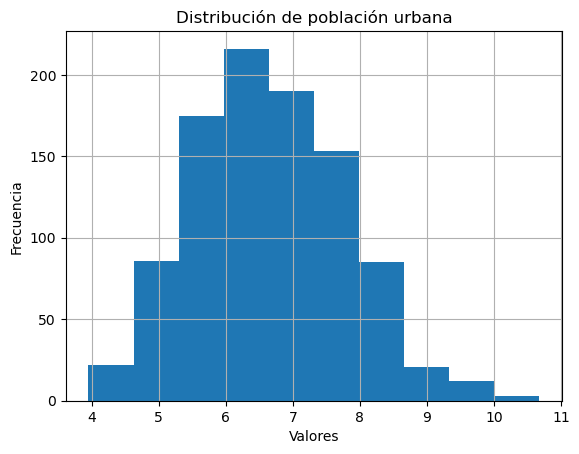

In [10]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


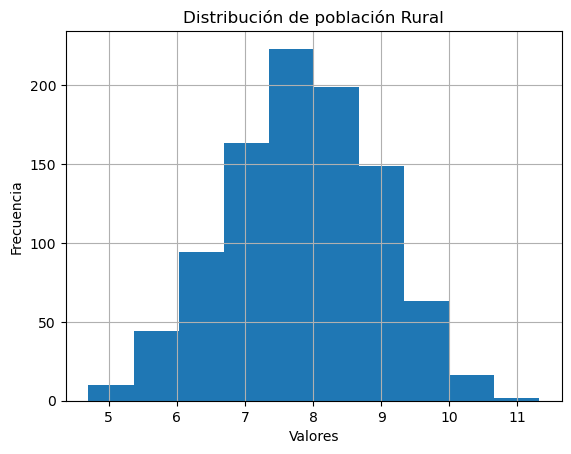

In [11]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


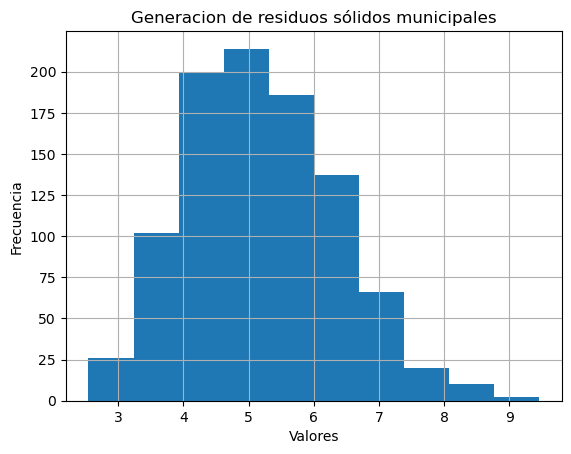

In [12]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

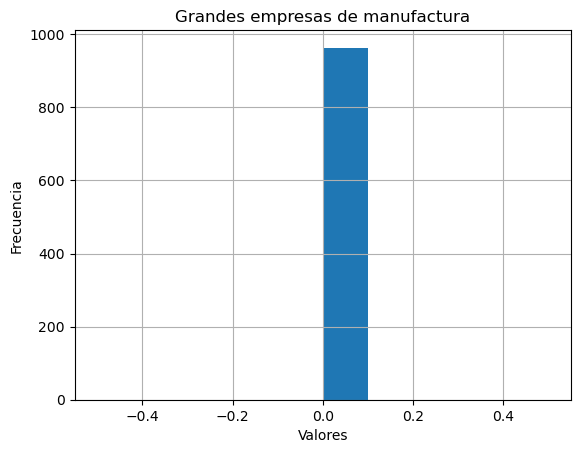

In [78]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["GE-Fabricación de productos textiles"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [14]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()\nplt.title("Mypimes de comercio")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [15]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()\nplt.title("Mypimes de manufactura")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [45]:
columnas_pob_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",
                                    "Log Residuos solidos municipales"                    
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,65:112]
df_var=pd.concat([columnas_pob_residuos,columnas_empresas], axis=1)            
print(df_var)

#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var):
    print(f"{idx},Nombre de la columna:{col}")

      Log Poblacion Urbana  Log Poblacion Rural  \
0                 4.912655             4.962845   
4                 5.141664             5.918894   
6                 4.882802             5.730100   
7                 4.418841             6.556778   
9                 5.252273             6.968850   
...                    ...                  ...   
1862              8.857800             9.381601   
1866              8.279190             8.345930   
1868              7.061334             8.761080   
1870              9.289798             9.534306   
1875              8.625150             9.432844   

      Log Residuos solidos municipales  \
0                             3.616040   
4                             3.841171   
6                             3.586847   
7                             3.134624   
9                             3.950089   
...                                ...   
1862                          6.780490   
1866                          6.391549   
1868     

In [77]:
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var.columns, columns=df_var.columns)
print(cov_df)

                                                    Log Poblacion Urbana  \
Log Poblacion Urbana                                            1.001040   
Log Poblacion Rural                                             0.739955   
Log Residuos solidos municipales                                0.986356   
GE-Elaboración de productos alimenticios y bebi...              0.166945   
GE-Fabricación de productos textiles_log                        0.000000   
GE-Fabricación de prendas de vestir; adobo y te...              0.000000   
GE-Curtido y adobo de cueros; fabricación de ma...              0.000000   
GE-Producción de madera y fabricación de produc...              0.000000   
GE-Fabricación de papel y de productos de papel...              0.000000   
GE-Actividades de edición e impresión y de repr...              0.000000   
GE-Fabricación de coque, productos de la refina...              0.000000   
GE-Fabricación de sustancias y productos químic...              0.016171   
GE-Fabricaci

In [69]:
"""# Filtrar los valores menores o iguales a 0.01 y mayores o iguales a -0.01
filtered_cov_df = cov_df.applymap(lambda x: x if x > 0 or x < -1 else np.nan)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(filtered_cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=filtered_cov_df.isnull())

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=4)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=4)
# Eliminar etiquetas en blanco
heatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])
heatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])

# Mostrar el mapa de calor
plt.title('Mapa de Calor de la Matriz de Covarianza (Valores > 0.1y < -0.1)')
plt.show()"""



"# Filtrar los valores menores o iguales a 0.01 y mayores o iguales a -0.01\nfiltered_cov_df = cov_df.applymap(lambda x: x if x > 0 or x < -1 else np.nan)\n\n# Crear el mapa de calor\nplt.figure(figsize=(10, 8))\nheatmap=sns.heatmap(filtered_cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=filtered_cov_df.isnull())\n\n# Ajustar el tamaño de la fuente de las etiquetas de los ejes\nheatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=4)\nheatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=4)\n# Eliminar etiquetas en blanco\nheatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])\nheatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])\n\n# Mostrar el mapa de calor\nplt.title('Mapa de Calor de la Matriz de Covarianza (Valores > 0.1y < -0.1)')\nplt.show()"

In [70]:

"""#Todas las variables
X = df_var.iloc[:,list(range(0,1))+list(range(3,50))]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Todas las variables\nX = df_var.iloc[:,list(range(0,1))+list(range(3,50))]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'

In [73]:
"""#Las variables con p<0.05
X=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",
"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", 
"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Las variables con p<0.05\nX=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",\n"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", \n"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'

In [74]:
"""#Verificar la regresion:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()"""

'#Verificar la regresion:\nimport pandas as pd\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport matplotlib.pyplot as plt\n\n\n# Ajustar el modelo de regresión lineal\nmodelo = LinearRegression()\nmodelo.fit(X, y)\n\n# Obtener los coeficientes y el intercepto\ncoeficientes = modelo.coef_\nintercepto = modelo.intercept_\nprint("Coeficientes:", coeficientes)\nprint("Intercepto:", intercepto)\n\n# Predecir los valores de la variable dependiente\ny_pred = modelo.predict(X)\n\n# Evaluar el modelo\nmse = mean_squared_error(y, y_pred)\nr2 = r2_score(y, y_pred)\nprint("MSE:", mse)\nprint("R^2:", r2)\n\n# Gráfico de Predicciones vs. Observaciones\nplt.scatter(y, y_pred)\nplt.xlabel(\'Valores Observados\')\nplt.ylabel(\'Valores Predichos\')\nplt.title(\'Predicciones vs. Observaciones\')\nplt.show()\n\n# Gráfico de Residuos\nresiduos = y - y_pred\nplt.scatter(y_pred, residuos)\nplt.xlabel(\'Valores Predichos\')\nplt.ylabel(\'Resid

In [75]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'], index=df_rrss_sinNaN.index)
print(pca_df)

            PC1       PC2       PC3
0     -2.785731  2.271444  0.563787
4     -2.730625  2.157273  0.502563
6     -2.732234  2.195202  0.534188
7     -2.758110  2.217301  0.525867
9     -2.293900  1.662898  0.303780
...         ...       ...       ...
1862   6.755302 -3.698806 -1.034579
1866   4.076874 -2.618556  0.461613
1868   7.034184  0.989082  8.954485
1870  12.958714 -1.554128  1.565014
1875   3.845140 -1.961968 -0.737152

[963 rows x 3 columns]


[0.3426164  0.17264422 0.04928589]


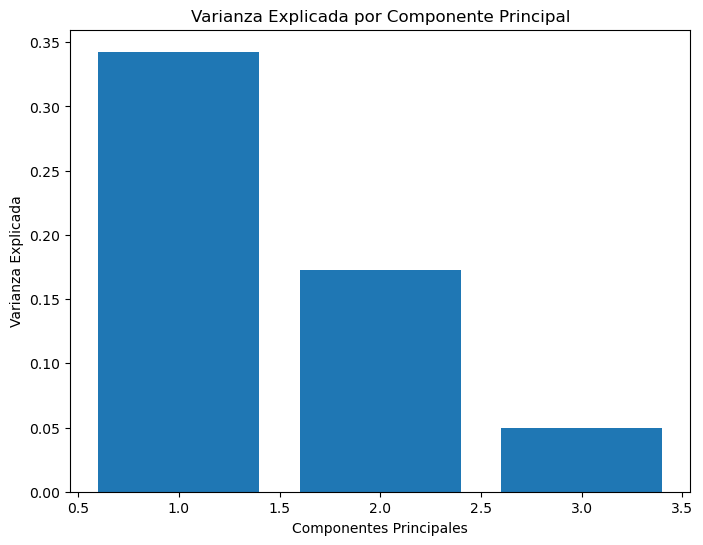

In [76]:
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()